In [ ]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

In [ ]:
from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data=pd.read_csv('/content/Admission_Predict.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)
print(data.isna().sum())
#printing the summary of data type
data.info()

(400, 9)
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
#first remove duplicates & recheck the size
data.drop_duplicates(inplace=True)

print(data.shape)

(400, 9)


In [ ]:
# As we saw there are some gap found in below two featurs so lets first remane the same and start our work
data.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [ ]:
data. columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
# first lets drop the unnecessary columns
data.drop(columns='Serial No.', axis=1, inplace=True)

In [ ]:
data.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


Data Visualization

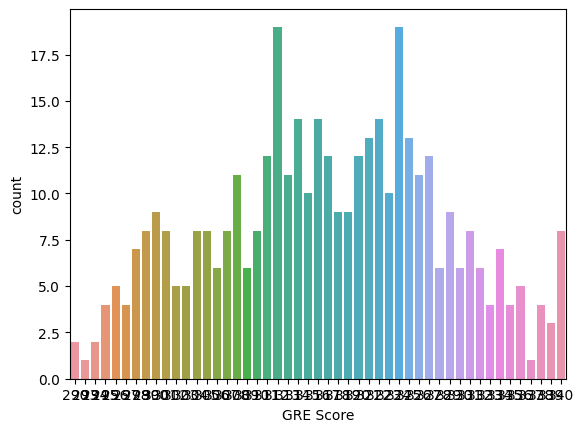

337     1
293     1
294     2
290     2
339     3
295     4
297     4
338     4
333     4
335     4
302     5
336     5
303     5
296     5
332     6
328     6
330     6
306     6
309     6
334     7
298     7
305     8
304     8
299     8
331     8
301     8
310     8
340     8
307     8
329     9
318     9
319     9
300     9
323    10
315    10
313    11
326    11
308    11
327    12
311    12
320    12
317    12
325    13
321    13
322    14
316    14
314    14
312    19
324    19
Name: GRE Score, dtype: int64


In [ ]:
#plot each class frequency
sns.countplot(x='GRE Score',data=data)
plt.show()
print(data['GRE Score'].value_counts(ascending=True))

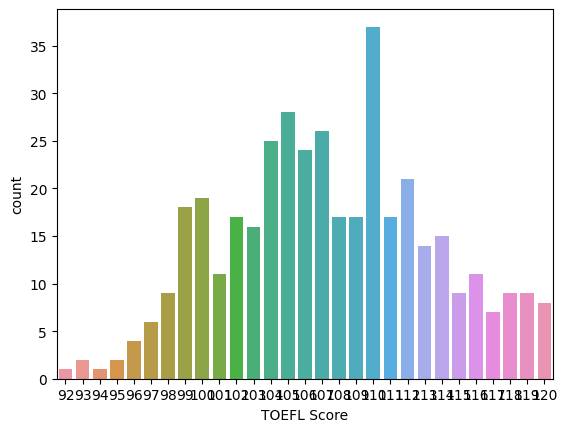

110    37
105    28
107    26
104    25
106    24
112    21
100    19
99     18
111    17
108    17
102    17
109    17
103    16
114    15
113    14
101    11
116    11
98      9
118     9
119     9
115     9
120     8
117     7
97      6
96      4
93      2
95      2
94      1
92      1
Name: TOEFL Score, dtype: int64


In [ ]:
#plot each class frequency
sns.countplot(x='TOEFL Score',data=data)
plt.show()
print(data['TOEFL Score'].value_counts())

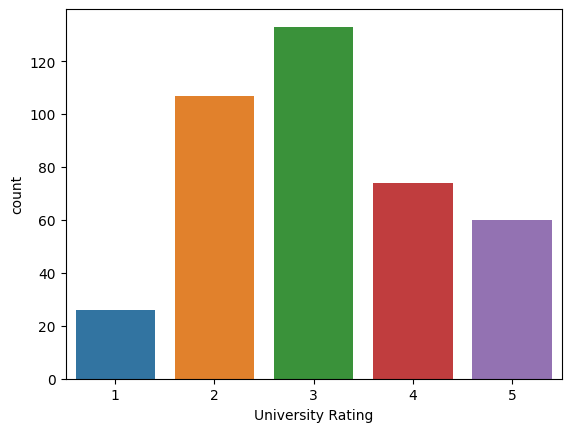

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64


In [ ]:
#plot each class frequency
sns.countplot(x='University Rating',data=data)
plt.show()
print(data['University Rating'].value_counts())

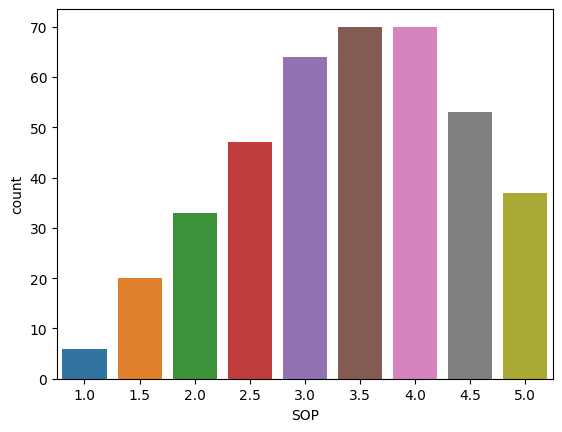

4.0    70
3.5    70
3.0    64
4.5    53
2.5    47
5.0    37
2.0    33
1.5    20
1.0     6
Name: SOP, dtype: int64


In [ ]:
#plot each class frequency
sns.countplot(x='SOP',data=data)
plt.show()
print(data['SOP'].value_counts())

from graph we cam see the count of Statement of Purpose and Letter of Recommendation Strength ( out of 5 ). So, the maximum rating is 4 with count of 89.

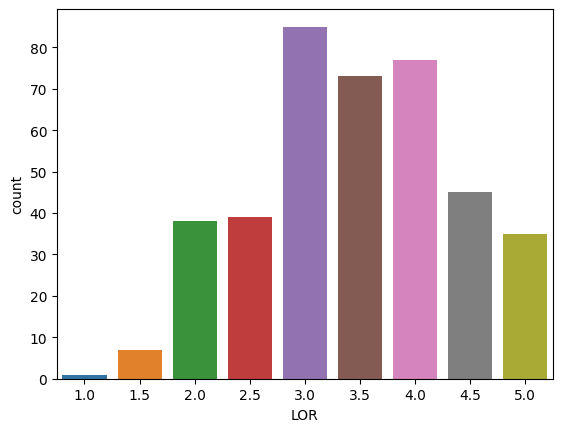

3.0    85
4.0    77
3.5    73
4.5    45
2.5    39
2.0    38
5.0    35
1.5     7
1.0     1
Name: LOR, dtype: int64


In [ ]:
#plot each class frequency
sns.countplot(x='LOR',data=data)
plt.show()
print(data['LOR'].value_counts())

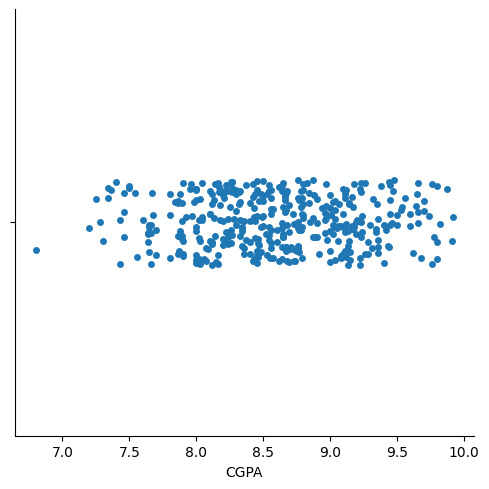

8.00    9
8.76    8
8.56    7
9.11    6
8.64    6
       ..
9.32    1
9.48    1
9.56    1
7.28    1
7.96    1
Name: CGPA, Length: 168, dtype: int64


In [ ]:
#plot each class frequency
sns.catplot(x='CGPA',data=data)
plt.show()
print(data['CGPA'].value_counts())

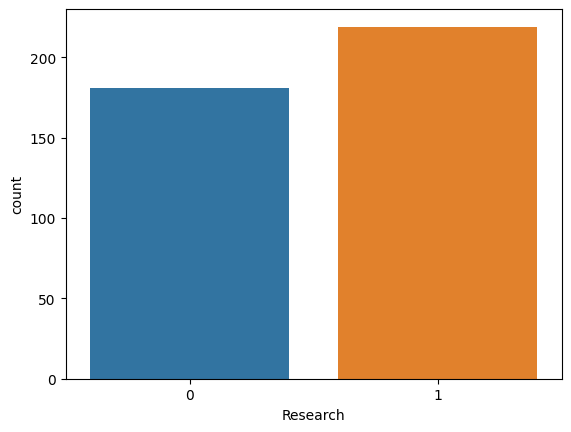

1    219
0    181
Name: Research, dtype: int64


In [ ]:
#plot each class frequency
sns.countplot(x='Research',data=data)
plt.show()
print(data['Research'].value_counts())

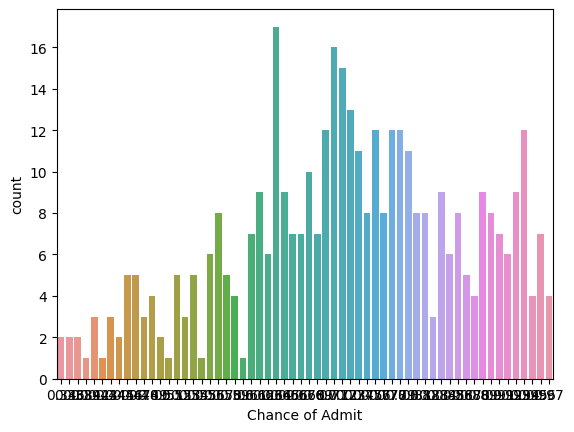

0.64    17
0.71    16
0.72    15
0.73    13
0.94    12
0.79    12
0.76    12
0.70    12
0.78    12
0.74    11
0.80    11
0.68    10
0.93     9
0.84     9
0.89     9
0.65     9
0.62     9
0.82     8
0.86     8
0.75     8
0.90     8
0.57     8
0.81     8
0.77     8
0.91     7
0.69     7
0.96     7
0.66     7
0.61     7
0.67     7
0.85     6
0.63     6
0.56     6
0.92     6
0.58     5
0.46     5
0.87     5
0.54     5
0.52     5
0.47     5
0.59     4
0.49     4
0.97     4
0.88     4
0.95     4
0.53     3
0.48     3
0.44     3
0.42     3
0.83     3
0.38     2
0.34     2
0.36     2
0.45     2
0.50     2
0.43     1
0.51     1
0.55     1
0.60     1
0.39     1
Name: Chance of Admit, dtype: int64


In [ ]:
#plot each class frequency
sns.countplot(x='Chance of Admit',data=data)
plt.show()
print(data['Chance of Admit'].value_counts())

from count we can see that the minimum percentage of Chance of Admit if 37% and maximum is 97%.

But as we want to know that admission will happen or not so lets convert our target column into 0 to 1 or we can say into binary output. So, lets convert below 40% of admission of chance consider as o class and above that 1 class mean you get the admission.

In [ ]:
data['Chance_of_admit']=[0 if x<=0.50 else 1 for x in data['Chance of Admit']]

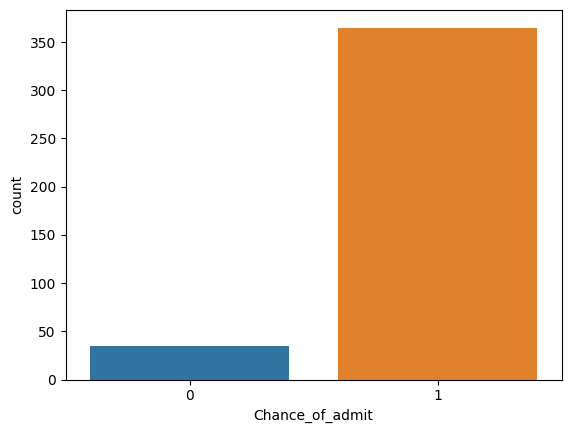

1    365
0     35
Name: Chance_of_admit, dtype: int64


In [ ]:
#plot each class frequency
sns.countplot(x='Chance_of_admit',data=data)
plt.show()
print(data['Chance_of_admit'].value_counts())

In [ ]:
#lets Drop the old column
data.drop(columns='Chance of Admit', axis=1, inplace=True)

In [ ]:
data.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1


<Figure size 1500x600 with 0 Axes>

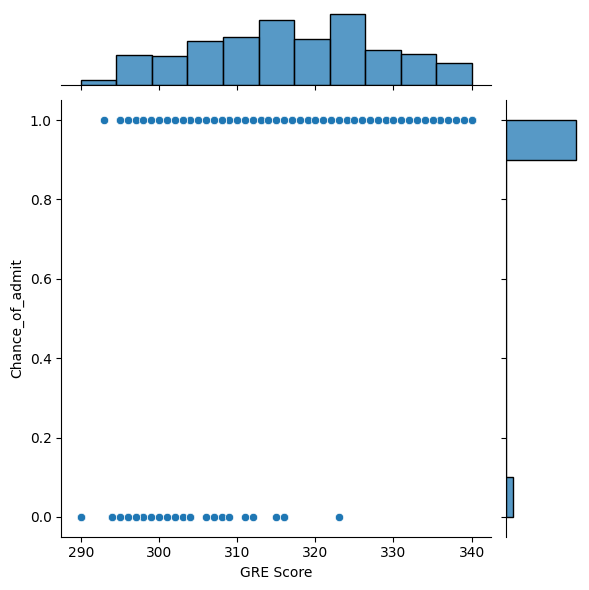

In [ ]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.jointplot(y ='Chance_of_admit', x ='GRE Score', data = data)
plt.show()

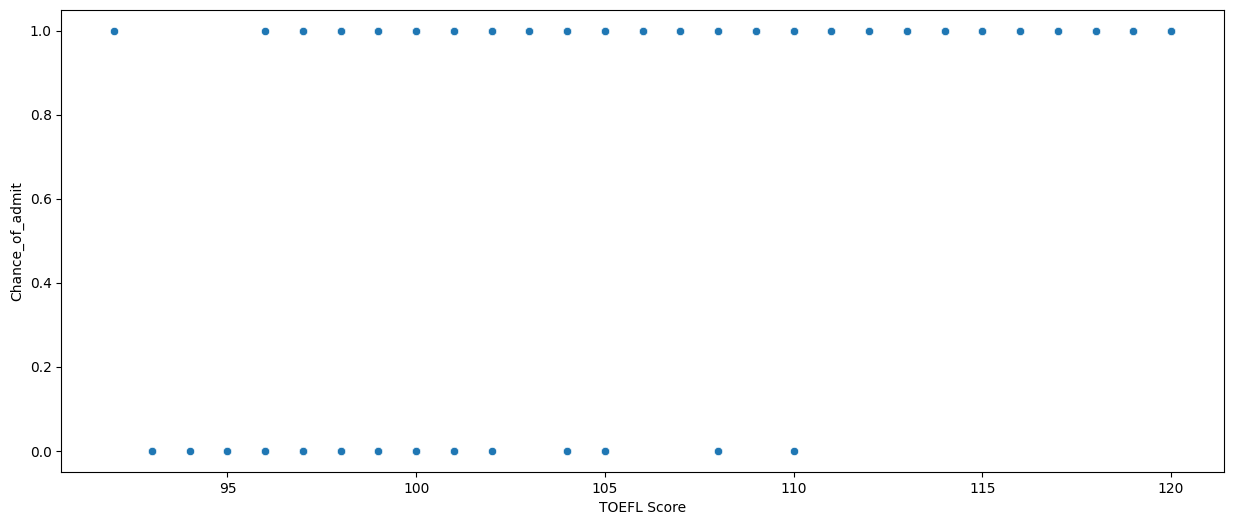

In [ ]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.scatterplot(y ='Chance_of_admit', x ='TOEFL Score', data = data)
plt.show()

as we seen as ther TOFEL Score incrested the chance of admission will increased.

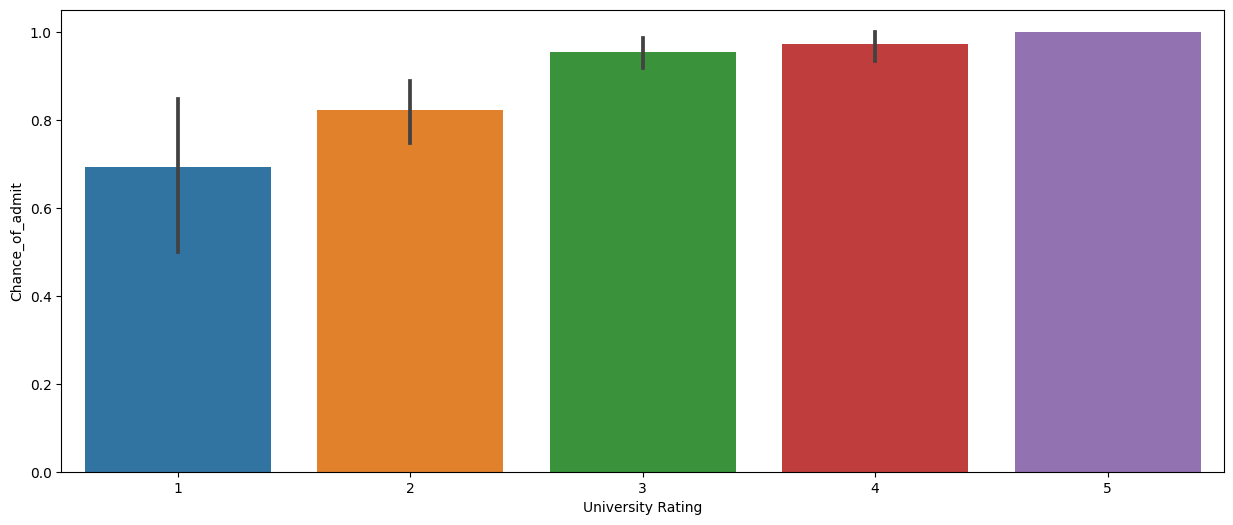

In [ ]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Chance_of_admit', x ='University Rating', data = data)
plt.show()

As we seen the maximum rating has the maximum admissions.

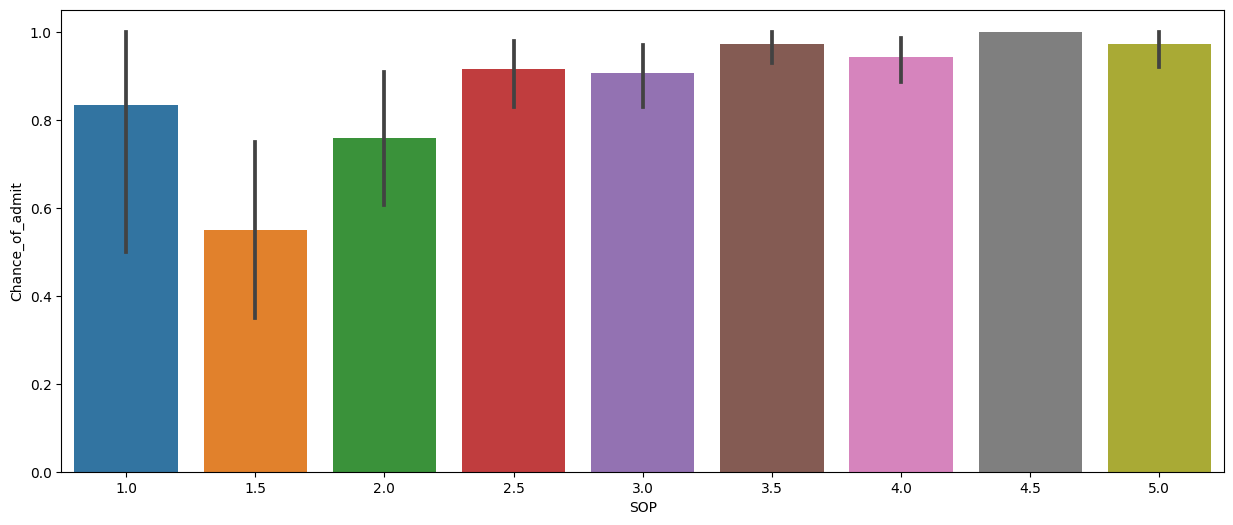

In [ ]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Chance_of_admit', x ='SOP', data = data)
plt.show()

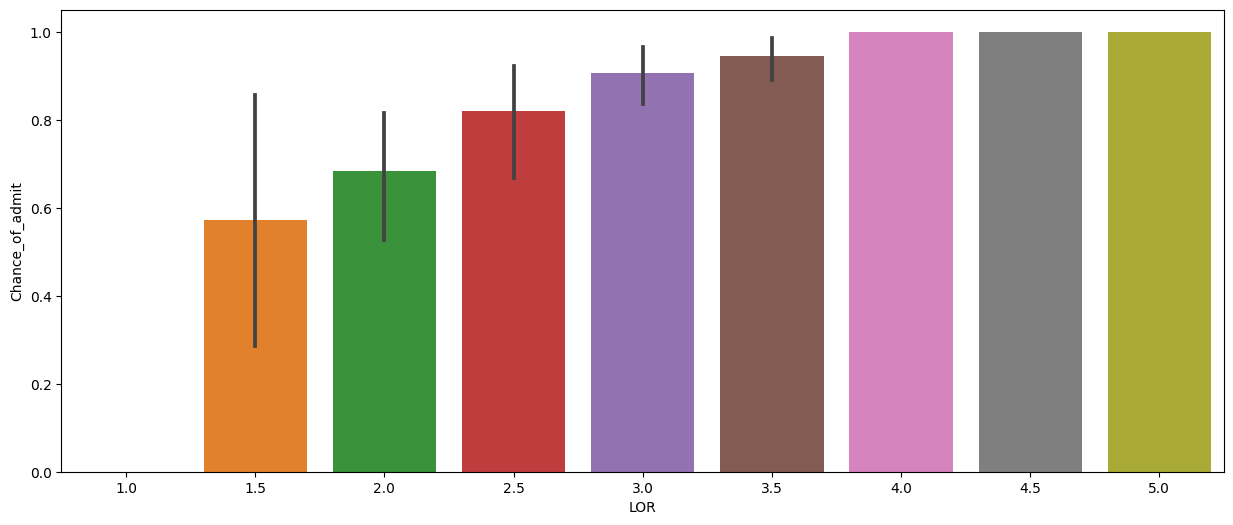

In [ ]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Chance_of_admit', x ='LOR', data = data)
plt.show()

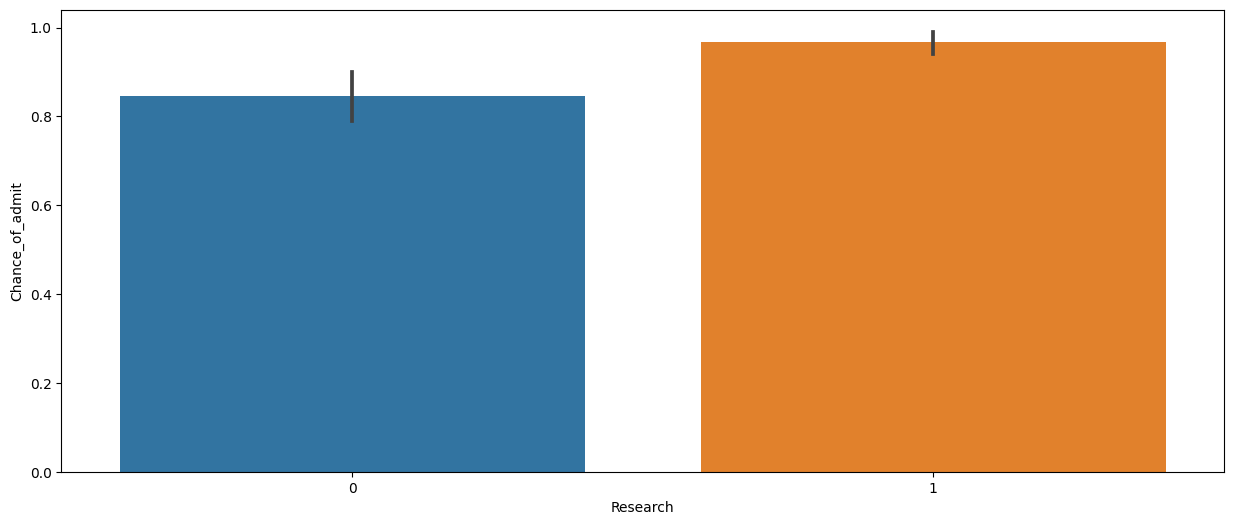

In [ ]:
#Bivariant graph
plt.figure(figsize =(15,6))
sns.barplot(y ='Chance_of_admit', x ='Research', data = data)
plt.show()

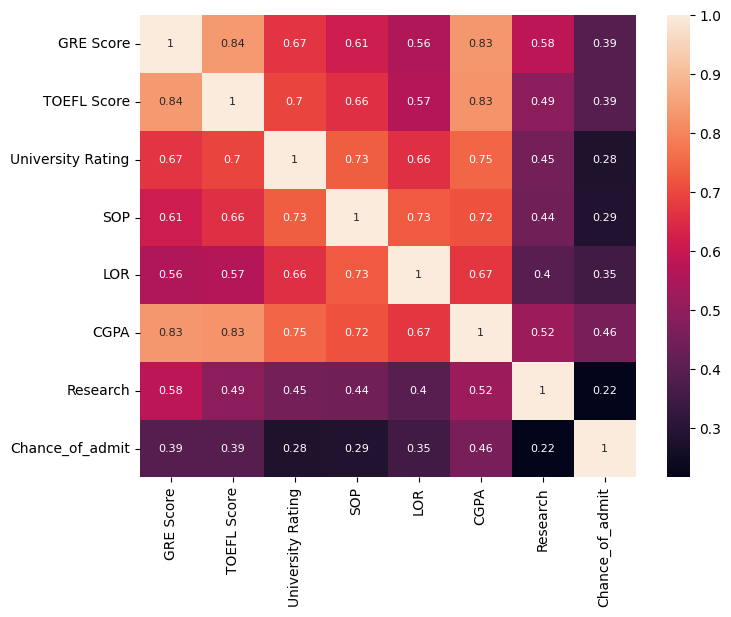

In [ ]:
#check multicolinearity
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':8})
plt.show()

from above heatmap we can see there is no multicolinarity.

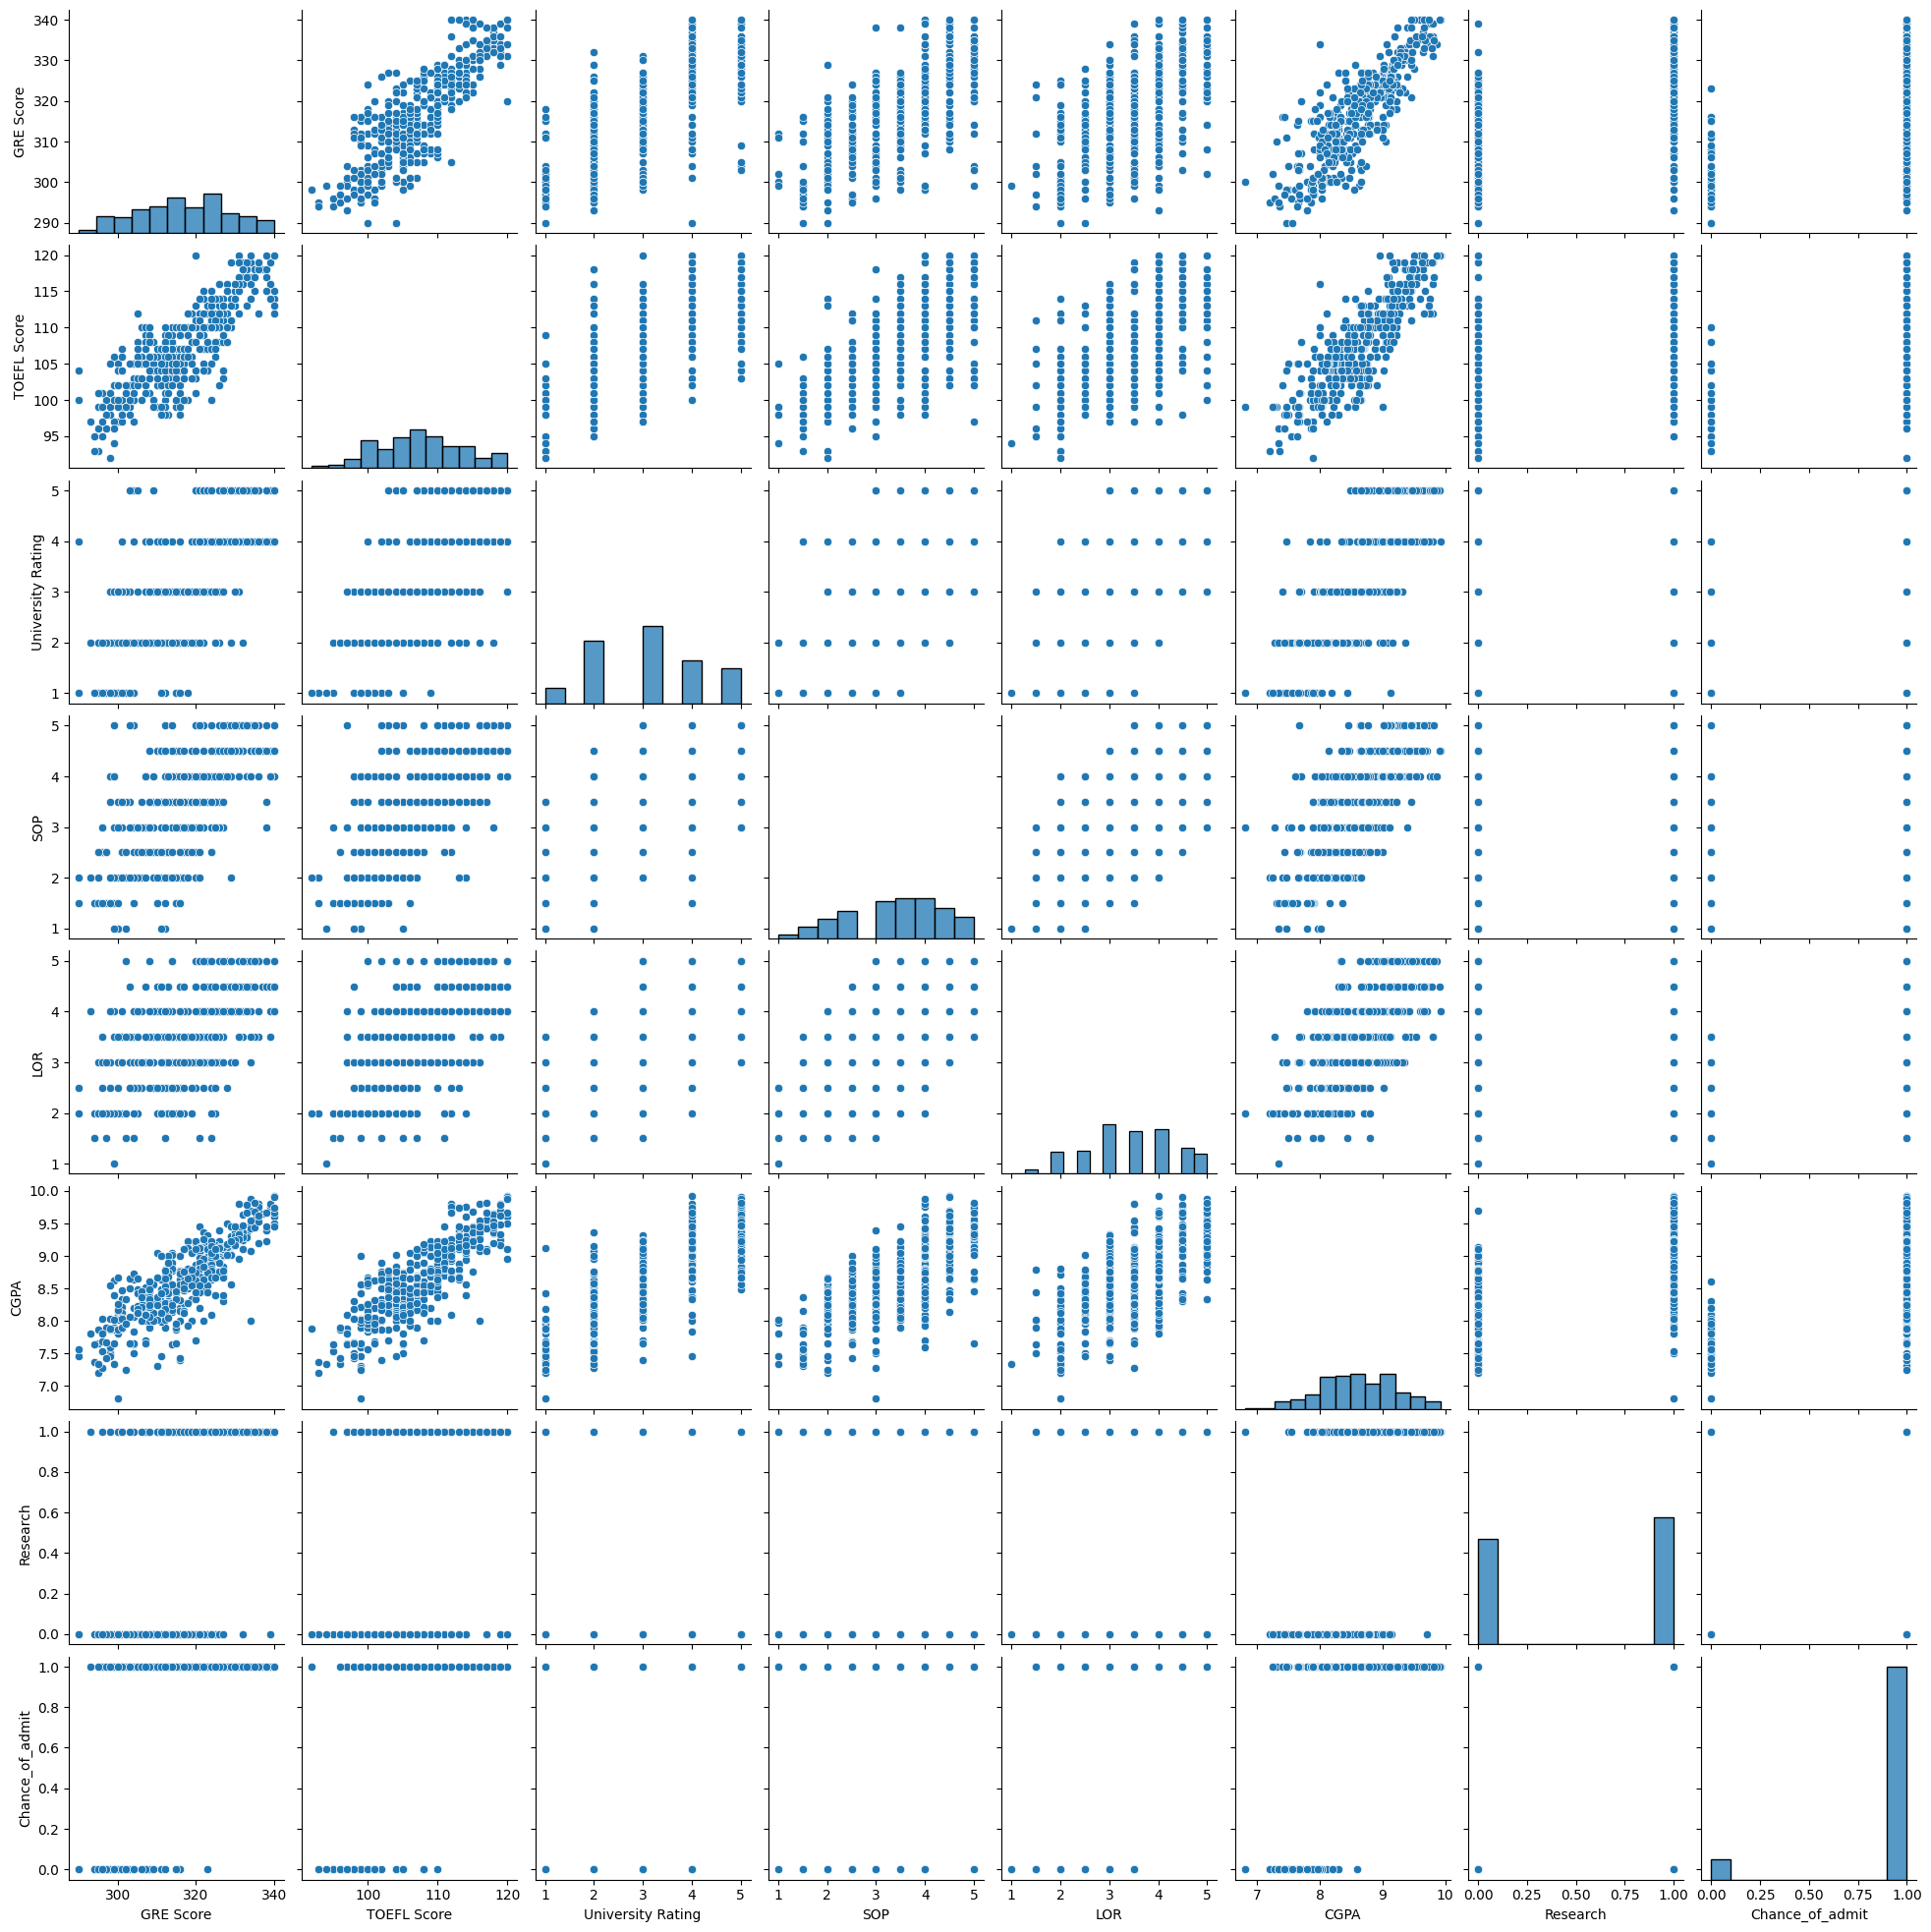

In [ ]:
sns.pairplot(data)
plt.show()

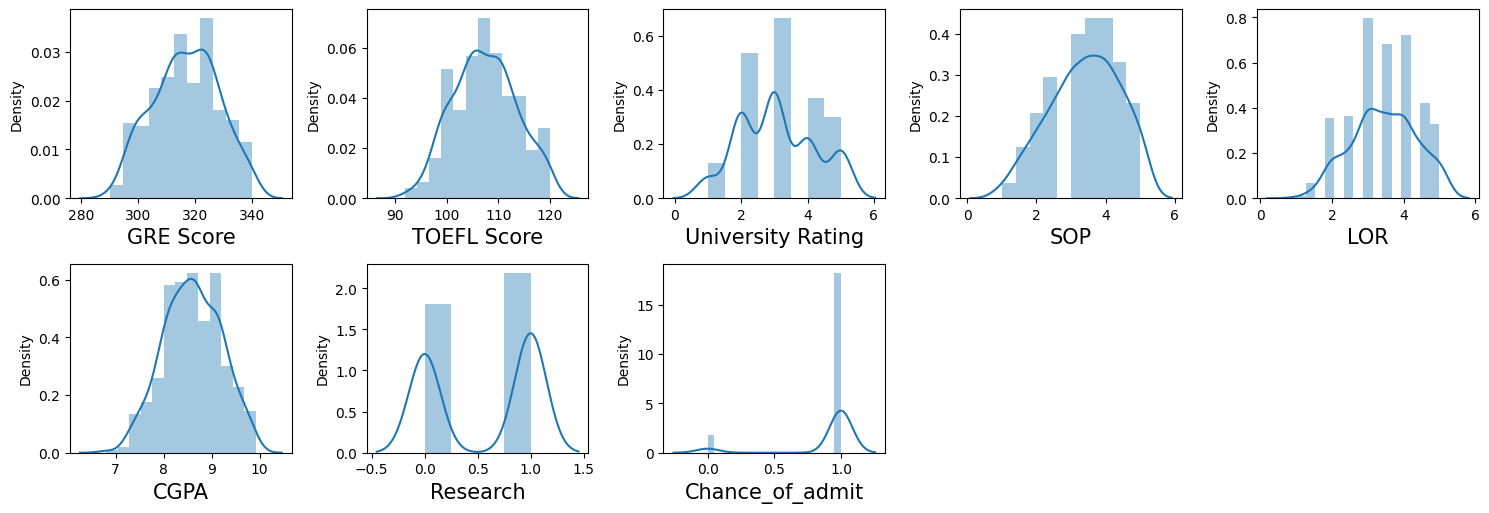

In [ ]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From distribusion we can see there is now skewness in dataset so lets check for the outliers.

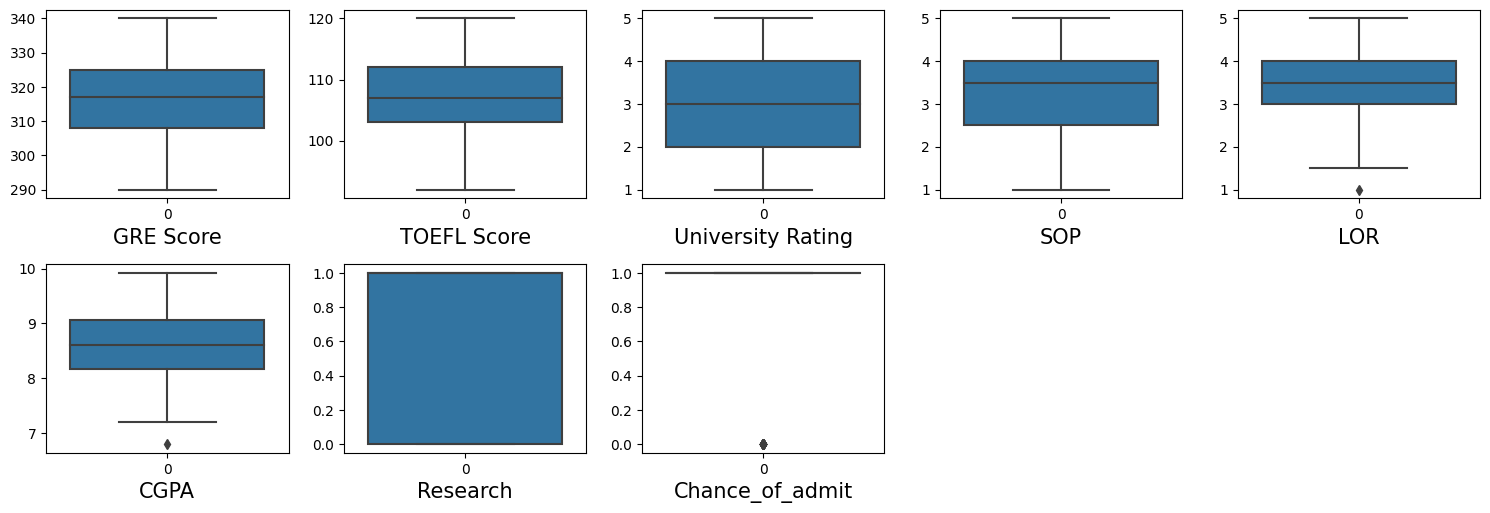

In [ ]:
#Let's check for the Outliers
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

from graph we can see there is outliers present in the colunms LOR so lets deal with it by zscore

In [ ]:
# Separate the outliers columns
df1=['LOR']

In [ ]:
from scipy.stats import zscore
z_score=zscore(data[df1])
abs_z_score=np.abs(z_score)
filter_entry=(abs_z_score<3).all(axis=1)
data=data[filter_entry]
data.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1


In [ ]:
data.shape

(400, 8)

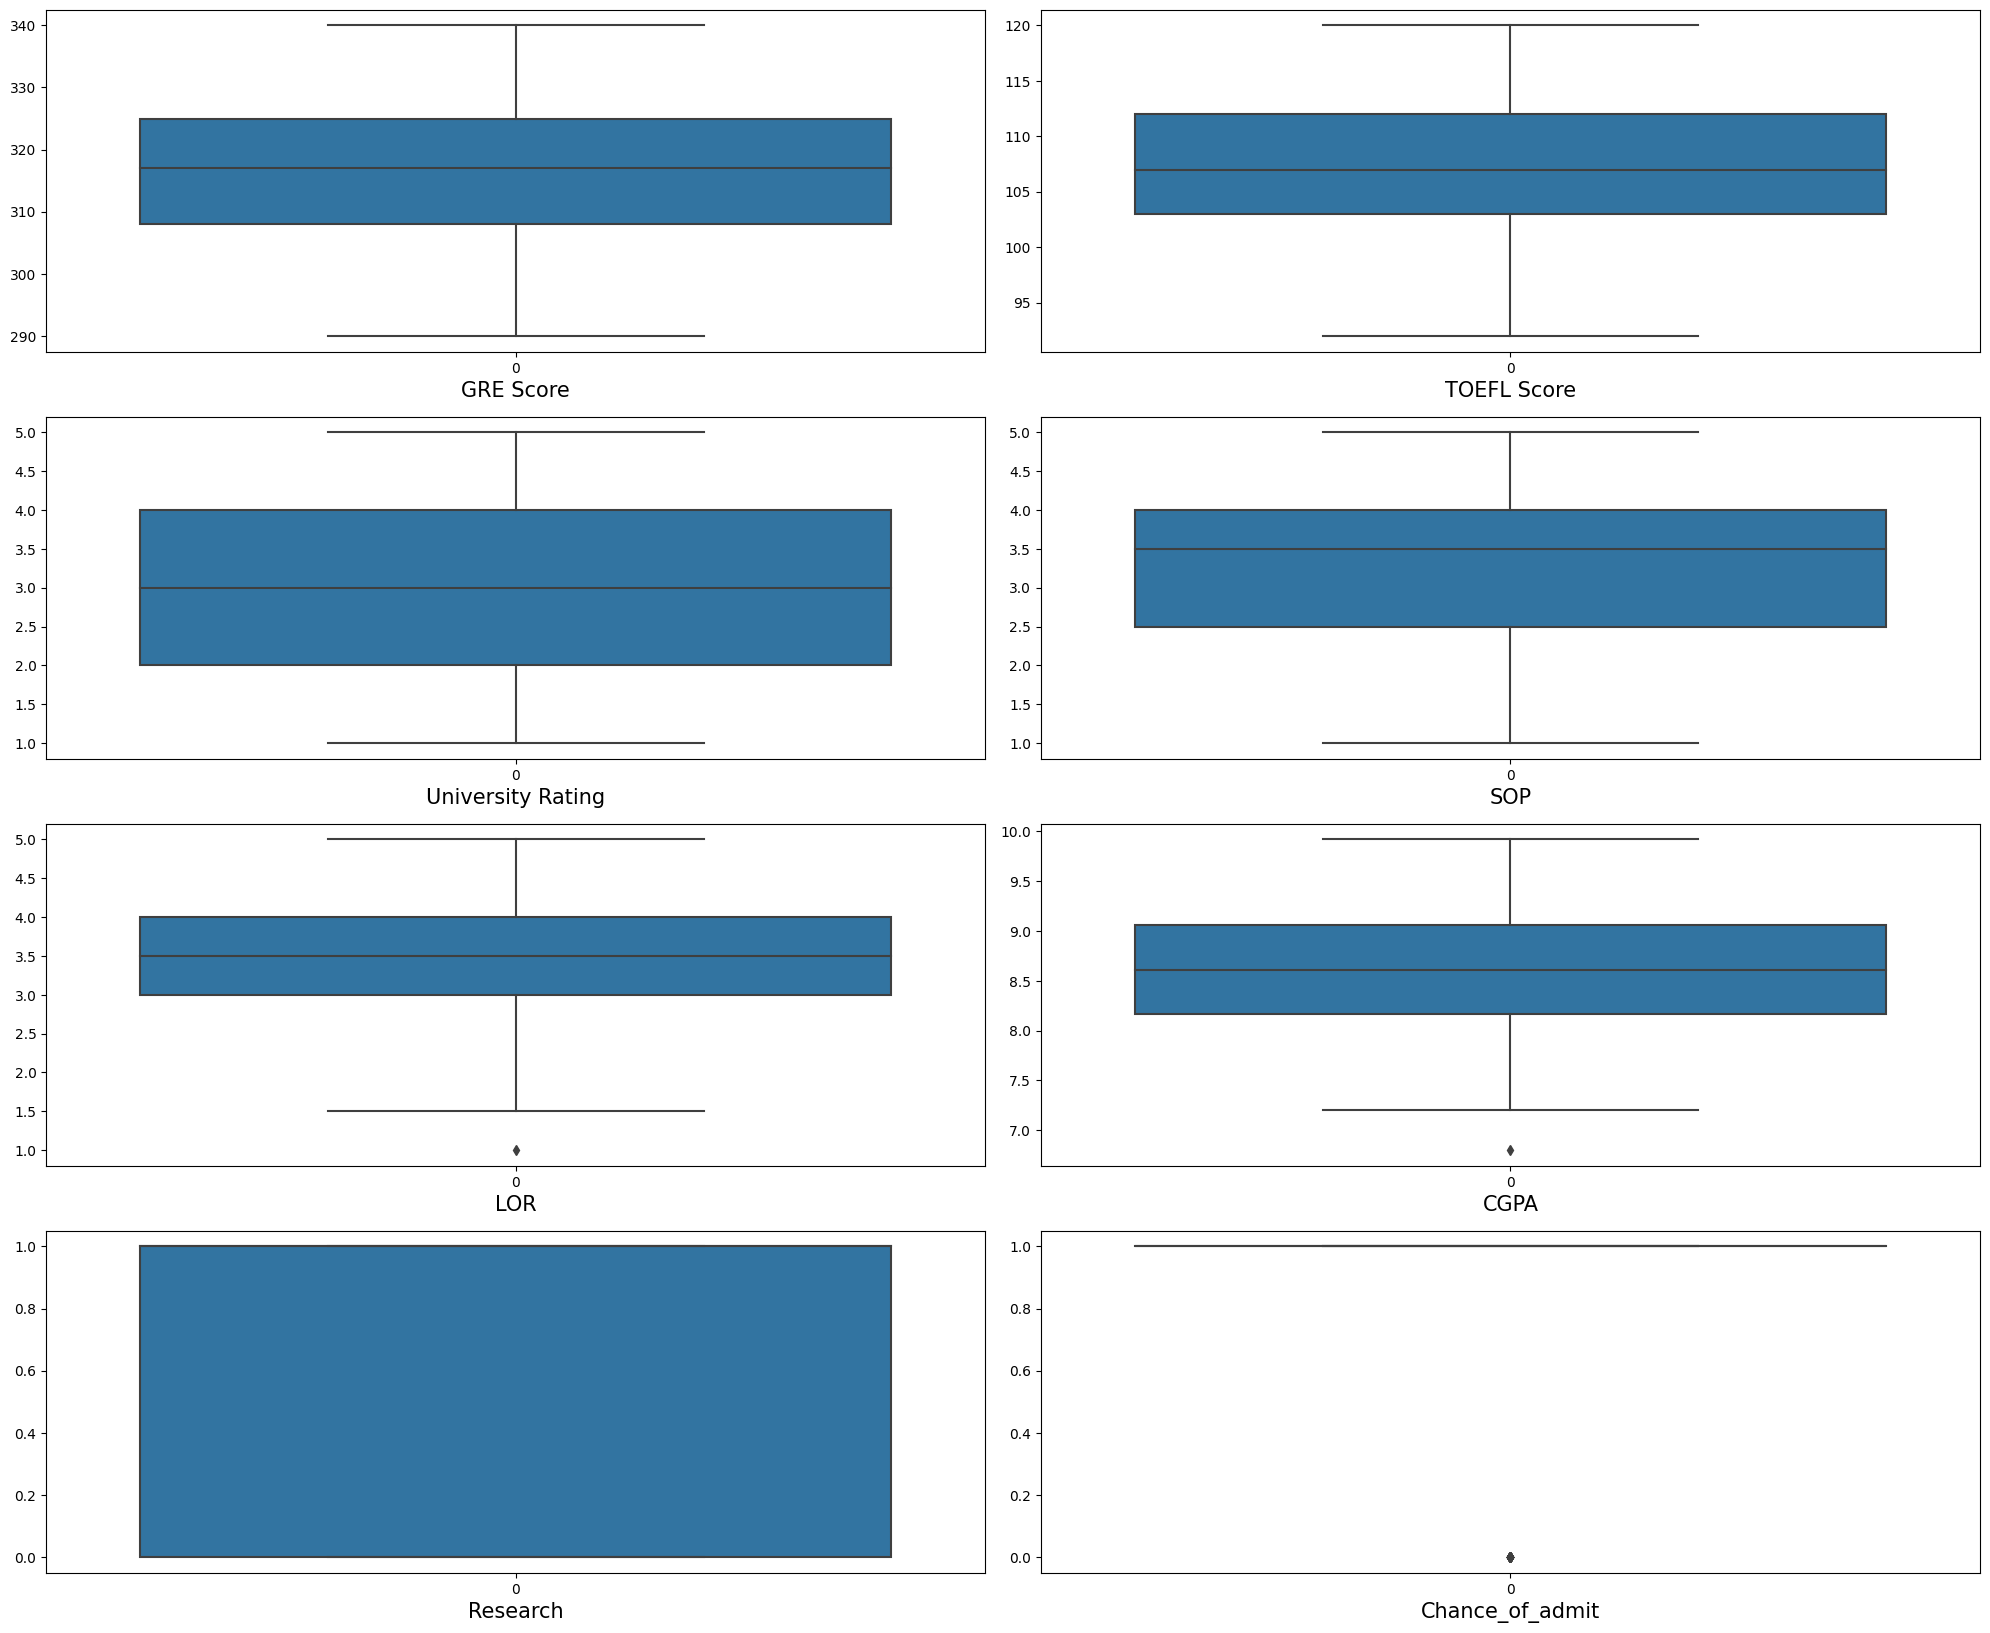

In [ ]:
#Let's see plot after removing outliers
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [ ]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['Chance_of_admit'])
y=data['Chance_of_admit']

In [ ]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [ ]:
#check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

        vif            featurs
0  4.615516          GRE Score
1  4.288959        TOEFL Score
2  2.919606  University Rating
3  3.075504                SOP
4  2.431258                LOR
5  5.207403               CGPA
6  1.543312           Research


In [ ]:
print(x.shape)
print(y.shape)

(400, 7)
(400,)


In [ ]:
# Lets select the proper random state to build best model by using LogisticRegression

from sklearn.linear_model import LogisticRegression

acc_score_test = 0
acc_score_train = 0
rand_state = 0
for i in range(1,200):

    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state= i )

    lr = LogisticRegression()
    lr.fit(x_train,y_train)

    y_pred=lr.predict(x_train) # prediction on train data
    r1 =accuracy_score(y_train,y_pred) # accuracy check on train data

    pred = lr.predict(x_test)   #prediction on test data
    r2 =accuracy_score(y_test,pred) #accuracy check on test data

    if r2 > acc_score_test and r1 > acc_score_train: # selecting max score accuracy
        acc_score_test = r2
        acc_score_train = r1
        rand_state = i
    print(f"at random sate {i}, the training accuracy is:- {acc_score_train}")
    print(f"at random sate {i}, the testing accuracy is:- {acc_score_test}")
    print("\n")
print('Best Training accuracy_score is {} on random state {}'.format(acc_score_train,rand_state))
print('Best Testing accuracy_score is {} on random state {}'.format(acc_score_test,rand_state))

at random sate 1, the training accuracy is:- 0.9464285714285714
at random sate 1, the testing accuracy is:- 0.925


at random sate 2, the training accuracy is:- 0.9464285714285714
at random sate 2, the testing accuracy is:- 0.925


at random sate 3, the training accuracy is:- 0.9464285714285714
at random sate 3, the testing accuracy is:- 0.925


at random sate 4, the training accuracy is:- 0.9571428571428572
at random sate 4, the testing accuracy is:- 0.9333333333333333


at random sate 5, the training accuracy is:- 0.9571428571428572
at random sate 5, the testing accuracy is:- 0.9333333333333333


at random sate 6, the training accuracy is:- 0.9571428571428572
at random sate 6, the testing accuracy is:- 0.9333333333333333


at random sate 7, the training accuracy is:- 0.9571428571428572
at random sate 7, the testing accuracy is:- 0.9333333333333333


at random sate 8, the training accuracy is:- 0.9571428571428572
at random sate 8, the testing accuracy is:- 0.9333333333333333


at rand

In [ ]:
rand_state

4

In [ ]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state= rand_state )

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 7)
(120, 7)
(280,)
(120,)


In [ ]:
# Lets use of Resampling Techniques to handle Imbalanced Data
from imblearn.over_sampling import SMOTE
from collections import Counter

ove_smp=SMOTE()
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({1: 253, 0: 27})
Counter({1: 253, 0: 253})


In [48]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()


import xgboost as xgb
xgb=xgb.XGBClassifier()

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

from sklearn.model_selection import cross_val_score


models=[]
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', dt))
models.append(('AdaBoostClassifier', ada))
models.append(('GradientBoostingClassifier', gb))
models.append(('RandomForestClassifier', rfc))
models.append(('XGBClassifier', xgb))
models.append(('KNeighborsClassifier', knn))

In [50]:
m=[]
score=[]
score2=[]
cv_score=[]

for name, model in models:
    print('***********************',name,'***********************')
    m.append(name)
    model.fit(x_train, y_train)
    print(model)
    y_pred=model.predict(x_train)
    AS=accuracy_score(y_train,y_pred)
    print("Train Report:",AS)
    score.append(AS*100)

    pred=model.predict(x_test)
    AS2=accuracy_score(y_test,pred)
    print("Test Report:",AS2)
    score2.append(AS2*100)
    CR=classification_report(y_test,pred)
    print("classification report:",CR)
    CM=confusion_matrix(y_test,pred)
    print("confusion matrix:", CM)

    accuracies= cross_val_score(model,x,y, cv=2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    cv_score.append(accuracies.mean()*100)
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('\n')

*********************** LogisticRegression ***********************
LogisticRegression()
Train Report: 0.9571428571428572
Test Report: 0.9333333333333333
classification report:               precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.94      0.99      0.97       112

    accuracy                           0.93       120
   macro avg       0.72      0.56      0.58       120
weighted avg       0.91      0.93      0.91       120

confusion matrix: [[  1   7]
 [  1 111]]
Accuracy: 91.50 %
Standard Deviation: 1.00 %


*********************** DecisionTreeClassifier ***********************
DecisionTreeClassifier()
Train Report: 1.0
Test Report: 0.9166666666666666
classification report:               precision    recall  f1-score   support

           0       0.33      0.25      0.29         8
           1       0.95      0.96      0.96       112

    accuracy                           0.92       120
   macro avg       0.6

In [51]:
print(len(m),len(score),len(score2),len(cv_score))

7 7 7 7


In [52]:
result = pd.DataFrame({'Model': m, 'Accuracy_train_score': score,'Accuracy_test_score': score2 ,'Cross_val_score':cv_score})
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score
0,LogisticRegression,95.714286,93.333333,91.50
1,DecisionTreeClassifier,100.000000,91.666667,89.25
2,AdaBoostClassifier,98.928571,93.333333,89.25
3,GradientBoostingClassifier,100.000000,91.666667,89.50
4,RandomForestClassifier,100.000000,93.333333,92.00
5,XGBClassifier,99.642857,92.500000,91.25
6,KNeighborsClassifier,94.285714,93.333333,92.75


In [53]:
result['least_diff']=(result['Accuracy_test_score']-result['Cross_val_score'])
result

,Model,Accuracy_train_score,Accuracy_test_score,Cross_val_score,least_diff
0,LogisticRegression,95.714286,93.333333,91.50,1.833333
1,DecisionTreeClassifier,100.000000,91.666667,89.25,2.416667
2,AdaBoostClassifier,98.928571,93.333333,89.25,4.083333
3,GradientBoostingClassifier,100.000000,91.666667,89.50,2.166667
4,RandomForestClassifier,100.000000,93.333333,92.00,1.333333
5,XGBClassifier,99.642857,92.500000,91.25,1.250000
6,KNeighborsClassifier,94.285714,93.333333,92.75,0.583333


From above we can see there are two models have least diffrance between crass validation score to test accuracy is XGBClassifier and DecisionTreeClassifier. But XGBClassifier has high accuracy 92% so i am selecting the XGBClassifier.

###HyperParameter Tuning

In [54]:
# Hyper tuning by using RandomizedSearchCV With RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

para={'n_estimators':[4,6,7],'learning_rate':[0.1,0.09,0.009],'random_state':[20,10,30]}
rand=RandomizedSearchCV(estimator=xgb, cv=2,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'random_state': 30, 'n_estimators': 6, 'learning_rate': 0.09}

In [56]:
import xgboost as xgb
xgb=xgb.XGBClassifier(random_state= 20, n_estimators= 6, learning_rate= 0.09)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_train)
AS=accuracy_score(y_train,y_pred)
print("Train Report:",AS*100)
pred=ada.predict(x_test)
AS2=accuracy_score(y_test,pred)
print("Test Report:",AS2*100)
CR=classification_report(y_test,pred)
print("classification report:",CR)
CM=confusion_matrix(y_test,pred)
print("confusion matrix:", CM)

accuracies= cross_val_score(xgb,x, y, cv=2)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Train Report: 98.92857142857143
Test Report: 93.33333333333333
classification report:               precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.94      0.99      0.97       112

    accuracy                           0.93       120
   macro avg       0.72      0.56      0.58       120
weighted avg       0.91      0.93      0.91       120

confusion matrix: [[  1   7]
 [  1 111]]
Accuracy: 91.25 %
Standard Deviation: 1.25 %


In [57]:
# Hyper tuning by using RandomizedSearchCV With RandomForestClassifier
from sklearn.model_selection import GridSearchCV

para={'n_estimators':[4,6,7],'learning_rate':[0.1,0.09,0.0003],'random_state':[20,10,30]}
grid=GridSearchCV(estimator=ada, cv=2,param_grid=para)
grid.fit(x_train,y_train)

grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 4, 'random_state': 20}

In [58]:
import xgboost as xgb
xgb=xgb.XGBClassifier(random_state= 20, n_estimators= 4, learning_rate= 0.1)


ada.fit(x_train,y_train)
y_pred=ada.predict(x_train)
AS=accuracy_score(y_train,y_pred)
print("Train Report:",AS*100)
pred=ada.predict(x_test)
AS2=accuracy_score(y_test,pred)
print("Test Report:",AS2*100)
CR=classification_report(y_test,pred)
print("classification report:",CR)
CM=confusion_matrix(y_test,pred)
print("confusion matrix:", CM)

accuracies= cross_val_score(xgb,x, y, cv=2)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
cv_score.append(accuracies.mean()*100)
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Train Report: 98.92857142857143
Test Report: 93.33333333333333
classification report:               precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.94      0.99      0.97       112

    accuracy                           0.93       120
   macro avg       0.72      0.56      0.58       120
weighted avg       0.91      0.93      0.91       120

confusion matrix: [[  1   7]
 [  1 111]]
Accuracy: 91.25 %
Standard Deviation: 1.25 %


So, Finally after hyper Tunning we see the better accuracy is with Gridsearch CV for XGBClassifier so i am selecting the same with 93.40%.

In [59]:
# Save Model
import pickle
file='Classi_Final_model.pickle'
model=pickle.dump(xgb,open(file,'wb'))